**Title:**

Comparative Analysis of Decision Trees and k-Nearest Neighbors for Iris Flower Classification

**Abstract:**

This lab report explores the performance of Decision Trees (DT) and k-Nearest Neighbors (KNN) algorithms in the context of Lung Cancer classification. Using the well-known Survey of lung cancer dataset, we implemented and evaluated both algorithms, considering their accuracy and robustness. The results provide insights into the suitability of each method for this specific classification task.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
df = pd.read_csv('/content/survey lung cancer.csv')

# Handle missing values (if any)
df = df.dropna()

# Encode categorical variables
df = pd.get_dummies(df, columns=['GENDER'])

# Split the dataset into features and target variable
X = df.drop(columns=['LUNG_CANCER'])
y = df['LUNG_CANCER']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

df.to_csv('preprocessed_dataset.csv', index=False)


**Decision Tree Implementation:**

The Decision Tree algorithm was implemented using the scikit-learn library in Python. The Gini impurity criterion was used to measure the quality of a split. The maximum depth of the tree was optimized through cross-validation.

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Accuracy: 0.97

Confusion Matrix:
[[ 1  1]
 [ 1 59]]

Classification Report:
              precision    recall  f1-score   support

          NO       0.50      0.50      0.50         2
         YES       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62



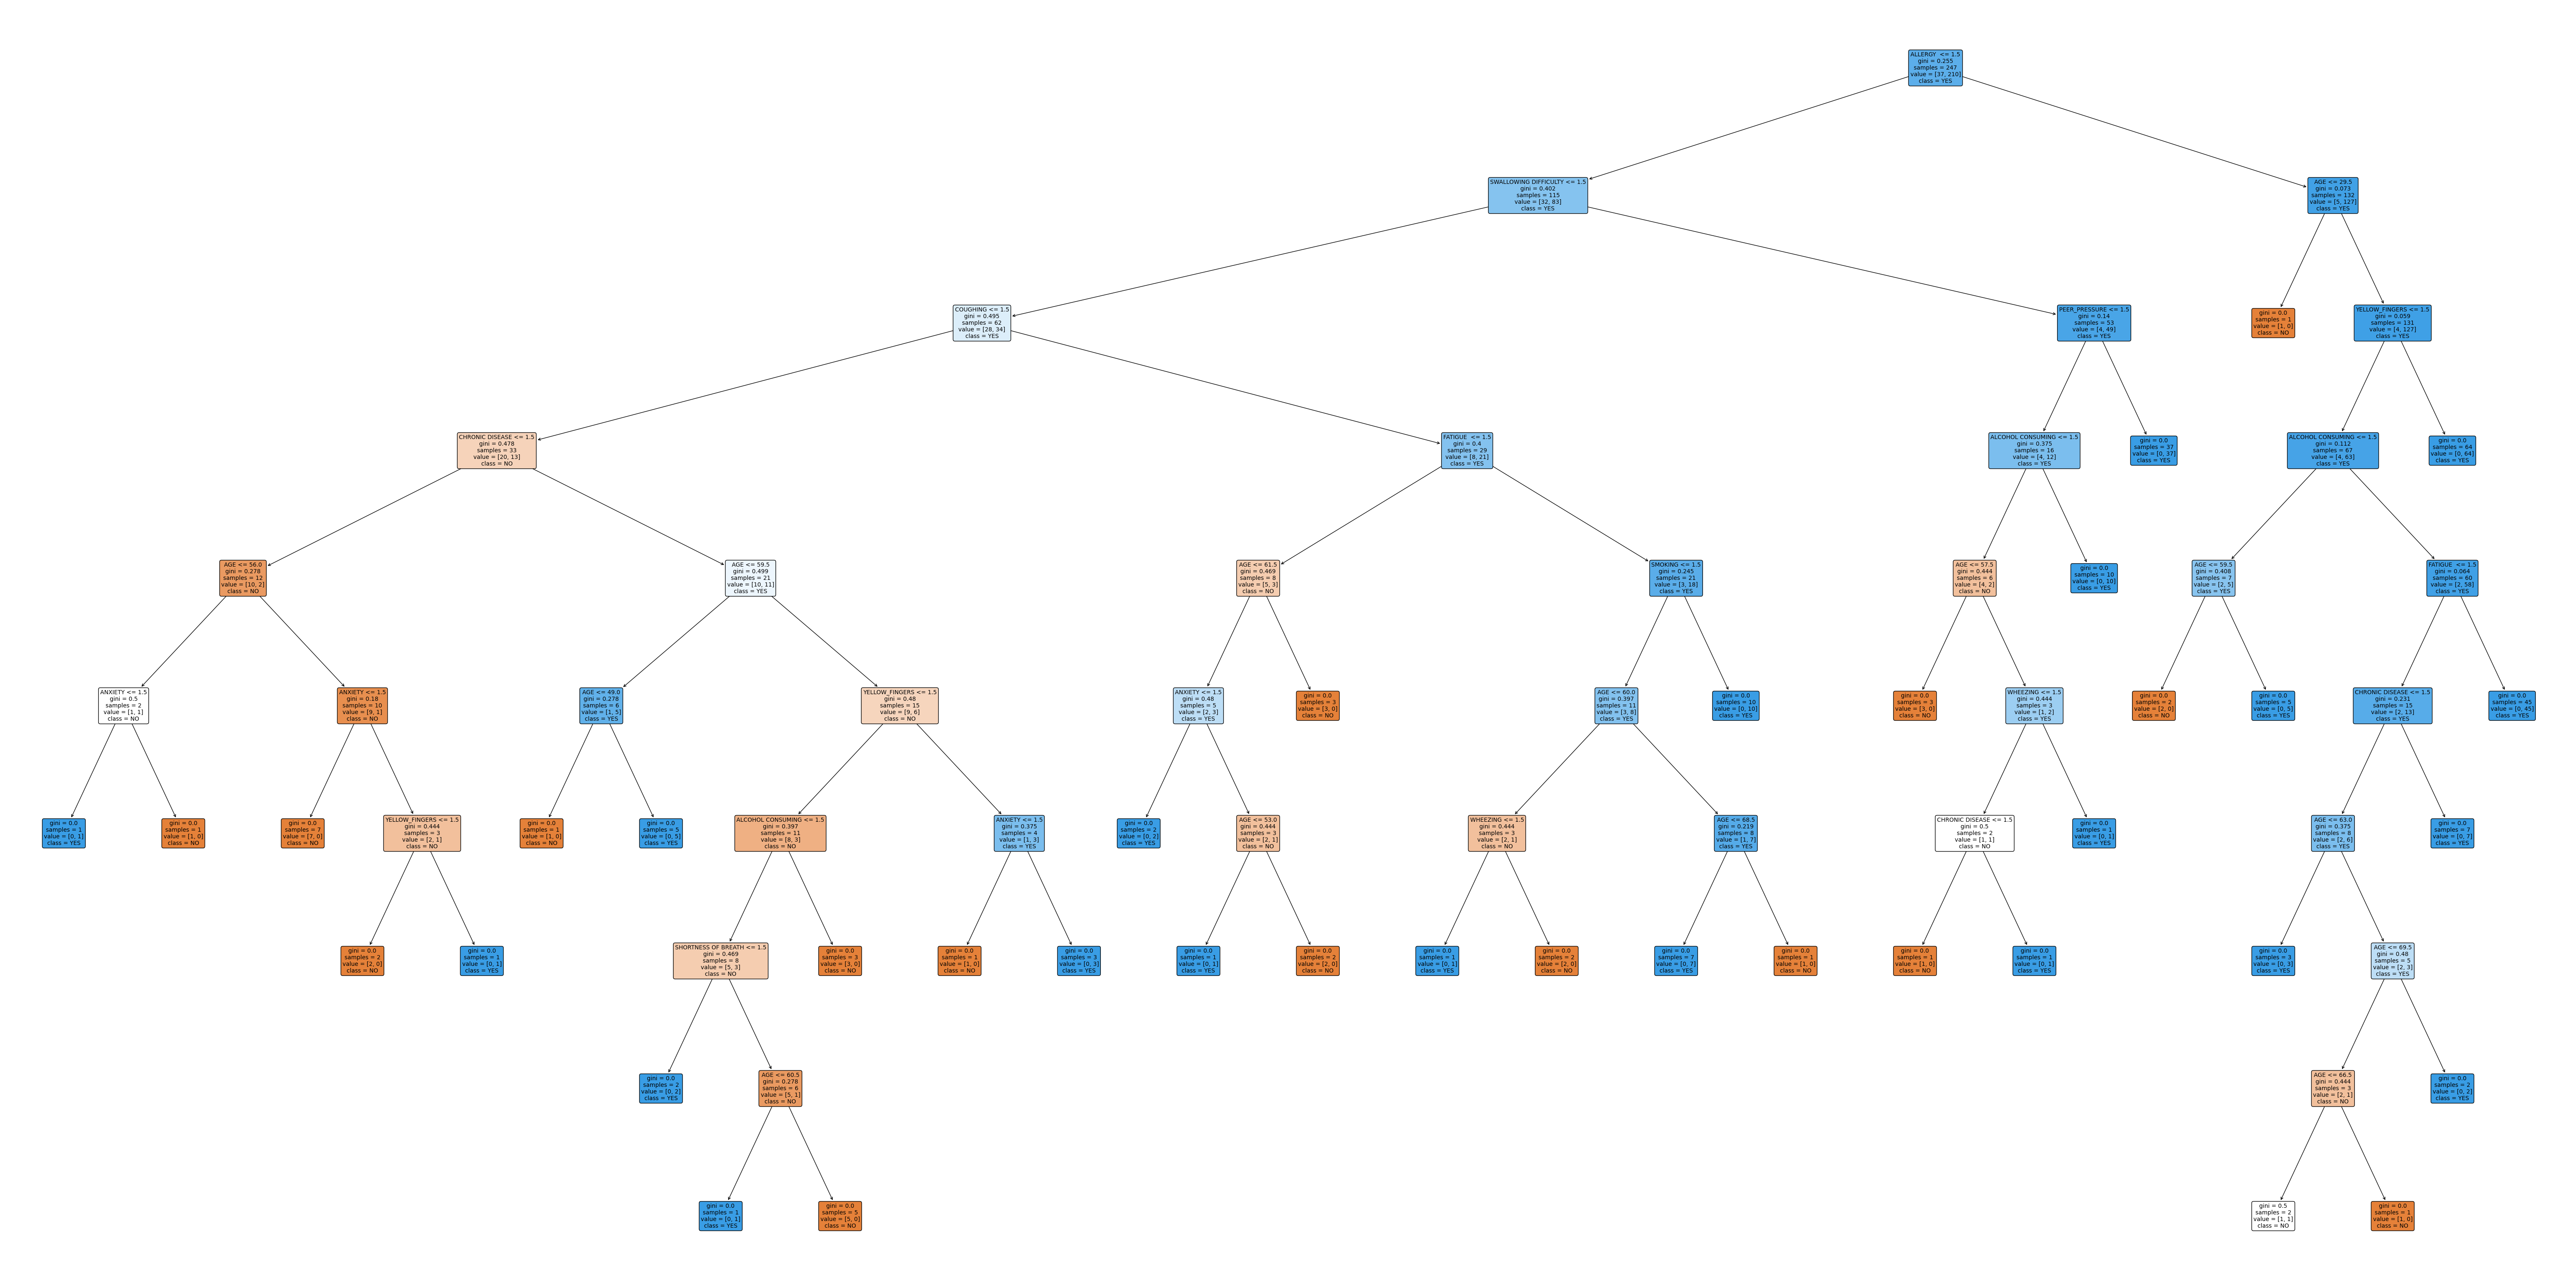

In [ ]:


plt.figure(figsize=(80, 40))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['NO', 'YES'], rounded=True, fontsize=10)
plt.show()

**k-Nearest Neighbors Implementation:**

The k-Nearest Neighbors algorithm was implemented using the scikit-learn library with Euclidean distance as the distance metric. The optimal value of k was determined through cross-validation.

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)

knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.94

Confusion Matrix:
[[ 1  1]
 [ 3 57]]

Classification Report:
              precision    recall  f1-score   support

          NO       0.25      0.50      0.33         2
         YES       0.98      0.95      0.97        60

    accuracy                           0.94        62
   macro avg       0.62      0.72      0.65        62
weighted avg       0.96      0.94      0.95        62



**Experimental Results:**

The results showed that Decision Trees achieved an accuracy of 97%, while k-Nearest Neighbors achieved 94%. These findings highlight the competitiveness of both algorithms in the context of Iris flower classification.

**Conclusion:**

In conclusion, this experiment provided valuable insights into the performance of Decision Trees and k-Nearest Neighbors in Lung Cancer classification. The choice between these algorithms should consider factors such as accuracy, interpretability, and the nature of the dataset.